In [3]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, precision_score, recall_score, f1_score, accuracy_score
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek


In [4]:
df = pd.read_csv("C:/Users/PRATHAM/Downloads/creditcard.csv/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print('No Fraud-', df['Class'].value_counts()[0]/len(df))
print('Fraud-', df['Class'].value_counts()[1]/len(df))

No Fraud- 0.9982725143693799
Fraud- 0.001727485630620034


### Data Visualization

In [8]:
sns.set(rc={'figure.figsize':(16,6)})

C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

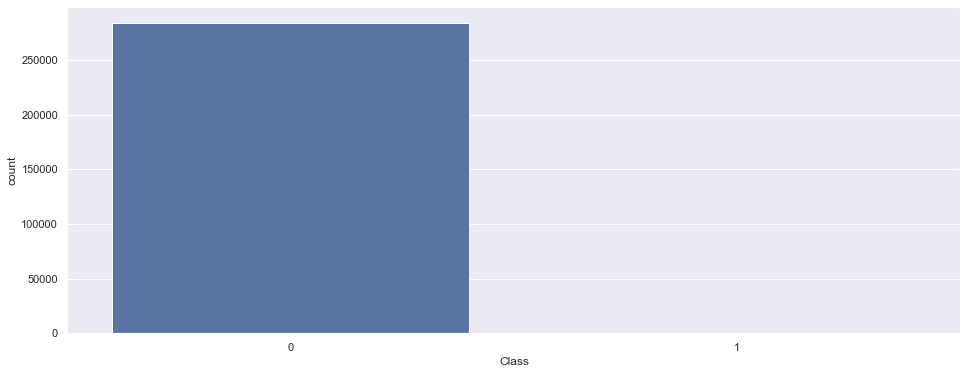

In [9]:
sns.countplot(df['Class'])

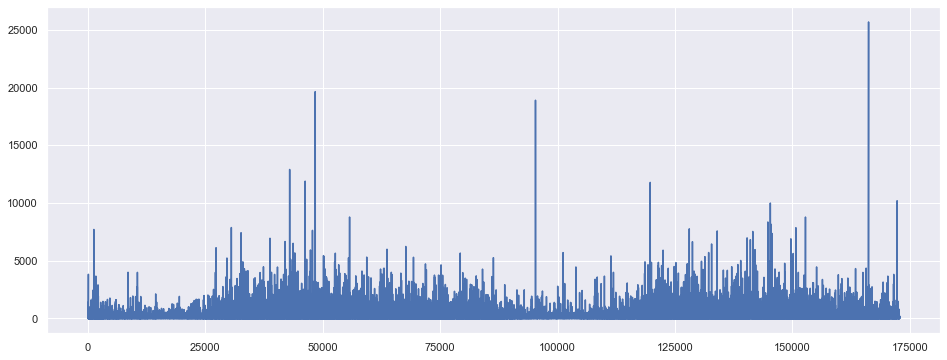

In [10]:
plt.plot(df['Time'],df['Amount'])

C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

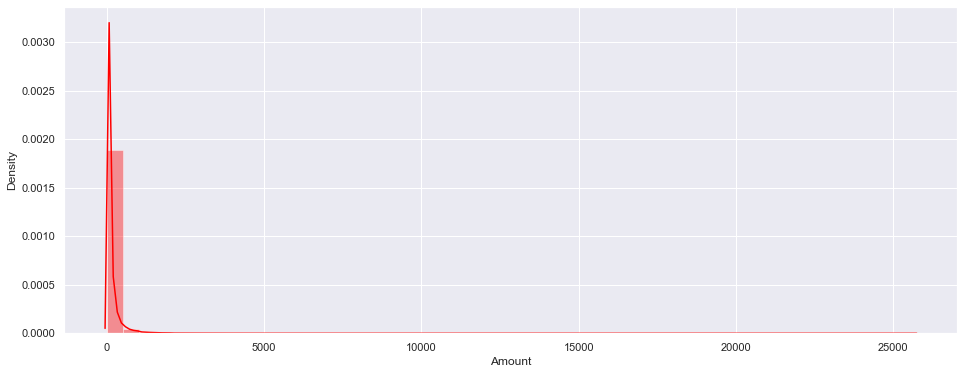

In [11]:
sns.distplot(df['Amount'],color='red')

C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

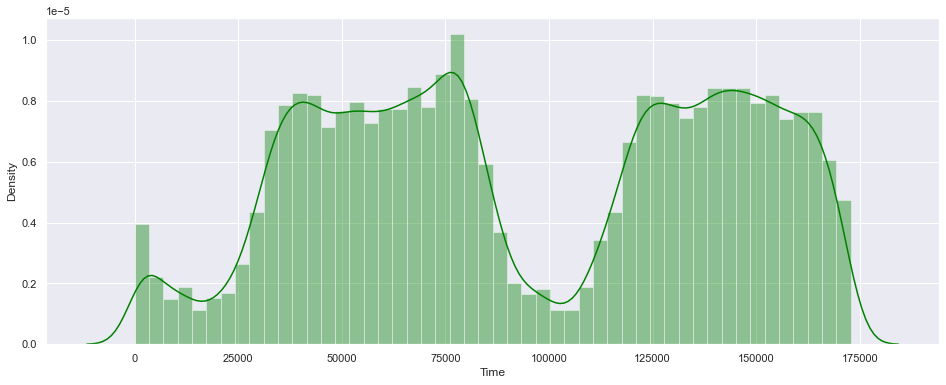

In [12]:
sns.distplot(df['Time'], color='green')

<AxesSubplot:>

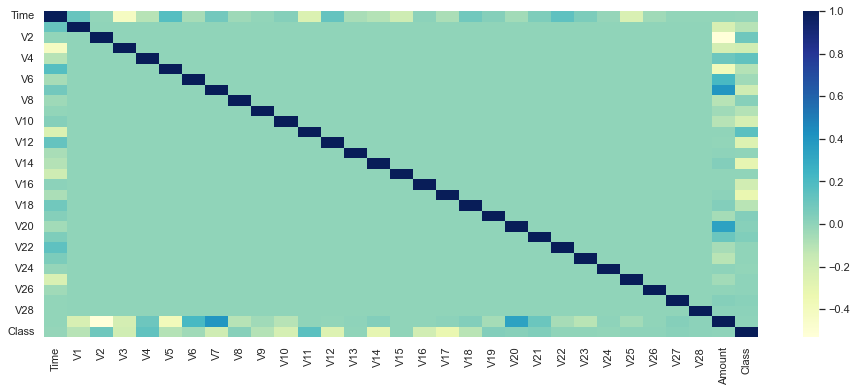

In [13]:
sns.heatmap(df.corr(), cmap = 'YlGnBu',annot=False)

### Data Preprocessing

In [14]:
# First we need to scale down the features 'Amount' and 'Time' as they are the only ones which haven't been transformed using PCA

In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
rob_scaler = RobustScaler()

In [8]:
Amount_scaled = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [9]:
Time_scaled = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [10]:
df.drop(['Amount','Time'], axis = 1, inplace= True)

In [11]:
df.insert(0,'Amount_scaled', Amount_scaled)
df.insert(1,'Time_scaled', Time_scaled)

In [12]:
df.head()

,Amount_scaled,Time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
# Using Stratified K-fold

In [13]:
X = df.iloc[:,0:-2].values

In [14]:
y = df.iloc[:,-1].values

In [15]:
X.shape

(284807, 29)

In [16]:
y.shape

(284807,)

In [17]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=23)

In [18]:
skf.get_n_splits(X,y)

10

In [19]:
for train_index, test_index in skf.split(X,y):
    
    print("Train:", train_index,"Test:", test_index )
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      5     13 ... 284781 284784 284788]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1      7     26 ... 284782 284793 284795]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     15     28 ... 284764 284767 284800]
Train: [     1      3      4 ... 284804 284805 284806] Test: [     0      2     18 ... 284777 284792 284797]
Train: [     0      1      2 ... 284803 284804 284805] Test: [    35     36     38 ... 284762 284774 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    10     14     17 ... 284786 284790 284798]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    20     25     29 ... 284758 284776 284780]
Train: [     0      1      2 ... 284803 284805 284806] Test: [     8      9     16 ... 284796 284802 284804]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     6     11     67 ... 284787 284791 284801]
Train: [     0     

In [20]:
# oversampling 

In [21]:
sm = SMOTE(random_state=42)

In [22]:
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [23]:
X_train_sm.shape

(511768, 29)

In [24]:
y_train_sm.shape

(511768,)

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Selecting parameters for Random Forest

In [ ]:
n_estimators = [100,300,500,1000,1500]
criterion = ["gini", "entropy", "log_loss"]
max_depth = [2,4,6]
max_features = ["sqrt", "log2", 'None']

In [ ]:
rf_param =  {'n_estimators': n_estimators,
             'criterion':criterion,
             'max_depth': max_depth,
             'max_features': max_features
             }

In [ ]:
def get_auc_score(model, X_train, y_train, X_test,y_test, get_param):
    clf = RandomizedSearchCV(model, param_distributions= get_param, n_iter=100, cv= 5,n_jobs=-1, random_state=1)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(clf.best_params_)
    print(roc_auc_score(y_test,pred))


In [ ]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print('TimeTaken:',(thour,tmin,round(tsec,2)))

In [ ]:
from datetime import datetime

In [ ]:

get_auc_score(RandomForestClassifier(), X_train_sm, y_train_sm,X_test, y_test, rf_param)

 Roc-auc score - 0.90 ,
 f1 score - 0.92   # mistakenly deleted the above cell and ran the code so due to computational time constraints can't execute the above cell again !!
    

### Training different models without any hyperparameter tuning

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
def acc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Confusion matrix:', confusion_matrix(y_test, y_pred))
    print('Classification report:', classification_report(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

In [27]:
### Logistic Regression model

In [39]:
acc(LogisticRegression(), X_train_sm, y_train_sm, X_test, y_test)

Confusion matrix: [[27729   702]
 [    9    40]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28431
           1       0.05      0.82      0.10        49

    accuracy                           0.98     28480
   macro avg       0.53      0.90      0.54     28480
weighted avg       1.00      0.98      0.99     28480

roc_auc_score: 0.8958175862937768
F1 score: 0.10113780025284451


C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
### RandomForest model

In [47]:
acc(RandomForestClassifier(), X_train_sm, y_train_sm, X_test, y_test)

Confusion matrix: [[28428     3]
 [   12    37]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.93      0.76      0.83        49

    accuracy                           1.00     28480
   macro avg       0.96      0.88      0.92     28480
weighted avg       1.00      1.00      1.00     28480

roc_auc_score: 0.8774982610961447
F1 score: 0.8314606741573034


In [42]:
### Xgboost model

In [45]:
from xgboost import XGBClassifier

In [46]:
acc(XGBClassifier(), X_train_sm, y_train_sm, X_test, y_test)

Confusion matrix: [[28419    12]
 [   12    37]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.76      0.76      0.76        49

    accuracy                           1.00     28480
   macro avg       0.88      0.88      0.88     28480
weighted avg       1.00      1.00      1.00     28480

roc_auc_score: 0.8773399831600889
F1 score: 0.7551020408163265


In [48]:
### K-nearest neighbour

In [51]:
acc(KNeighborsClassifier(), X_train_sm, y_train_sm, X_test, y_test)

Confusion matrix: [[28380    51]
 [   12    37]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.42      0.76      0.54        49

    accuracy                           1.00     28480
   macro avg       0.71      0.88      0.77     28480
weighted avg       1.00      1.00      1.00     28480

roc_auc_score: 0.8766541121038475
F1 score: 0.5401459854014599


In [52]:
### SVM model

In [1]:
### Adaboost Classifier

In [28]:
acc(AdaBoostClassifier(), X_train_sm, y_train_sm, X_test, y_test)

Confusion matrix: [[27824   607]
 [   11    38]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28431
           1       0.06      0.78      0.11        49

    accuracy                           0.98     28480
   macro avg       0.53      0.88      0.55     28480
weighted avg       1.00      0.98      0.99     28480

roc_auc_score: 0.8770801345757253
F1 score: 0.10951008645533142
